<div style="text-align: center; font-size: 32px; font-weight: bold;">
    PyTorch Tutorial 02.2 - Gradient Calculation
</div>

##  Gradient Calculation with Autograd
Differentiation is a crucial step in nearly all machine learning and deep learning optimization algorithms. While the calculations for taking these derivatives are straightforward, working out the updates by hand can be a tedious task. We will get a conceptual understanding of 
how __autograd__ works to find the __gradient__ of multivariable functions. \
We will discuss some fundamentals on _derivatives_, _partial derivatives_, _gradients_, and _Jacobians_. We then discuss how to compute _gradients_ using ```requires_grad=True``` and the ```backward()``` method. 
Thus, we cover ```classes``` and ```functions``` implementing __automatic differentiation__ of arbitrary scalar-valued and non-scalar-valued functions. We also discuss the _Jacobian matrix_ in PyTorch. 

### Computational Graph
We discussed in above section, how computational graphs are generated in PyTorch.

$$f(x,y)=log(x*y)$$

- NN optimize weights and biases using forward and backward propagation.
- Deep learnign graphs record tensors and operations in directed acyclic graph (DAG). An example of DAG  is shown in the figure below, where `x`, and `y` are input tensors, which goes into multiplication operation, gives `v`, whcih is then passed to `log`, gives `w`. here multiplication is an element-wise operation, then `log` is a functional oeration. \
In tensorflow these graphs are compiled apriori to start of DL or NN training, whereas,
- PyTorch uses dynamic graphs, built at runtime for efficiency. So because of dynamic graph code actually becomes the graph.
- In the graph, nodes represent operations (functions) and edges represents the tensors. $x,y,v,w$ are nodes in the computational graph. multiplication and log are the operators.

<div style="text-align: center;">
    <img src="D:\\Data\\Wax\pygimli_data_abhishek\\pytorch\\images\\02_CG.PNG" alt="Computational Graph" width="600">
</div>

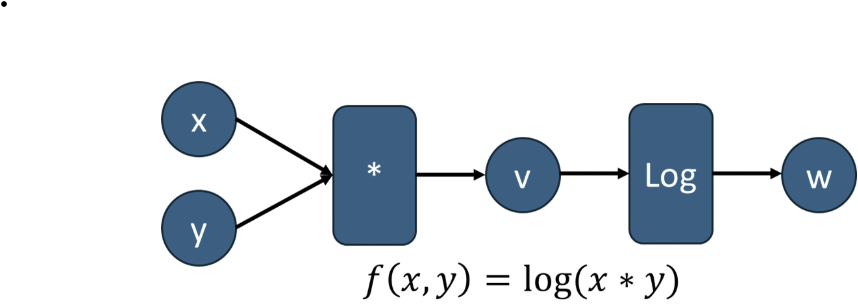

- Computational graphs are useful in creating `Autograd`. The way it is done that once we build the graph dynamically during tensor operation and recorded all the dependencies. We can now use this dynamic computation graph to compute the gradients for the tensors by travelling in the graph in backward direction. This is performed using __Chain Rule__. Once we compute the backward propagation using chain rule, we get the gradients and once we have have the gradients, the optimization of parameters during model training can go.



### Graph Visualization
- Different ways to visualize the model
- Simple way is to call `print(model)`
        - Quick summary but lacks the pictorial visual. Cant tell whats the input, output of model size, how to interpret model layers. \
        - Not suitable for deep networks 
- Some other options are: \
        - Torchviz: It uses graph based visualization. Gives all the operations performed in PyTorch.  \
        - Tensorboard
- Let’s consider small network with 3 fully-connected layers
 ```
        - input = nn.Linear(in_features=4, out_features=16)
        - hidden_1 = nn.Linear(in_features=16, out_features=16)
        - output = nn.Linear(in_features=16, out_features=3)
 ```


## Graph Visualization
- Different ways to visualize the model
- Simple way is to call `print(model)`
        - Quick summary but lacks the pictorial visual. Cant tell whats the input, output of model size, how to interpret model layers. \
        - Not suitable for deep networks 
- Some other options are: \
        - Torchviz: It uses graph based visualization. Gives all the operations performed in PyTorch.  \
        - Tensorboard
- Let’s consider small network with 3 fully-connected layers
 ```
        - input = nn.Linear(in_features=4, out_features=16)
        - hidden_1 = nn.Linear(in_features=16, out_features=16)
        - output = nn.Linear(in_features=16, out_features=3)
 ```


## Torchviz
```
pip install torchviz
```

In [ ]:
from torchviz import make_dot

model = Net()
y=model(X)

make_dot(y.mean(), params=dict(model.named_parameters()))

Graph Visualization using torch viz for a small network
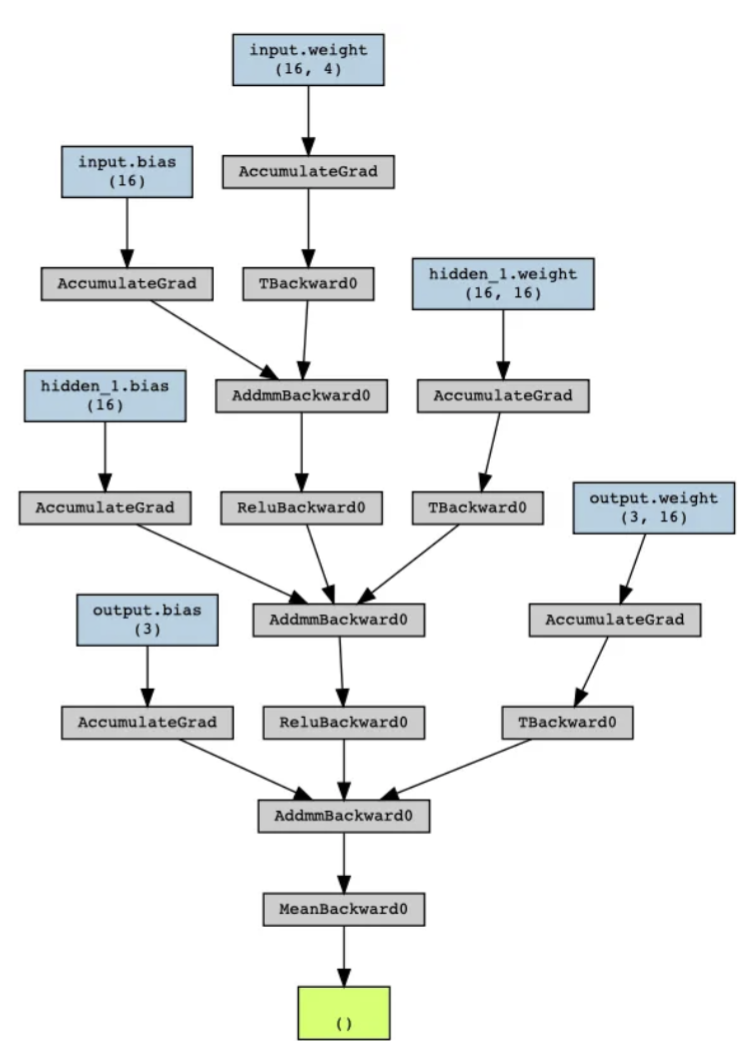


## Tensorboard
```
pip install tensorboard
```

In [ ]:
from torch.utils.tensorboard import SummaryWriter

writer = SummaryWriter("torchlogs/")
model = Net()
writer.add_graph(model, X)
writer.close()

cd <path-to-logs-dir>
tensorboard --logdir=./

Graph Visualization using tensorboard for a small network
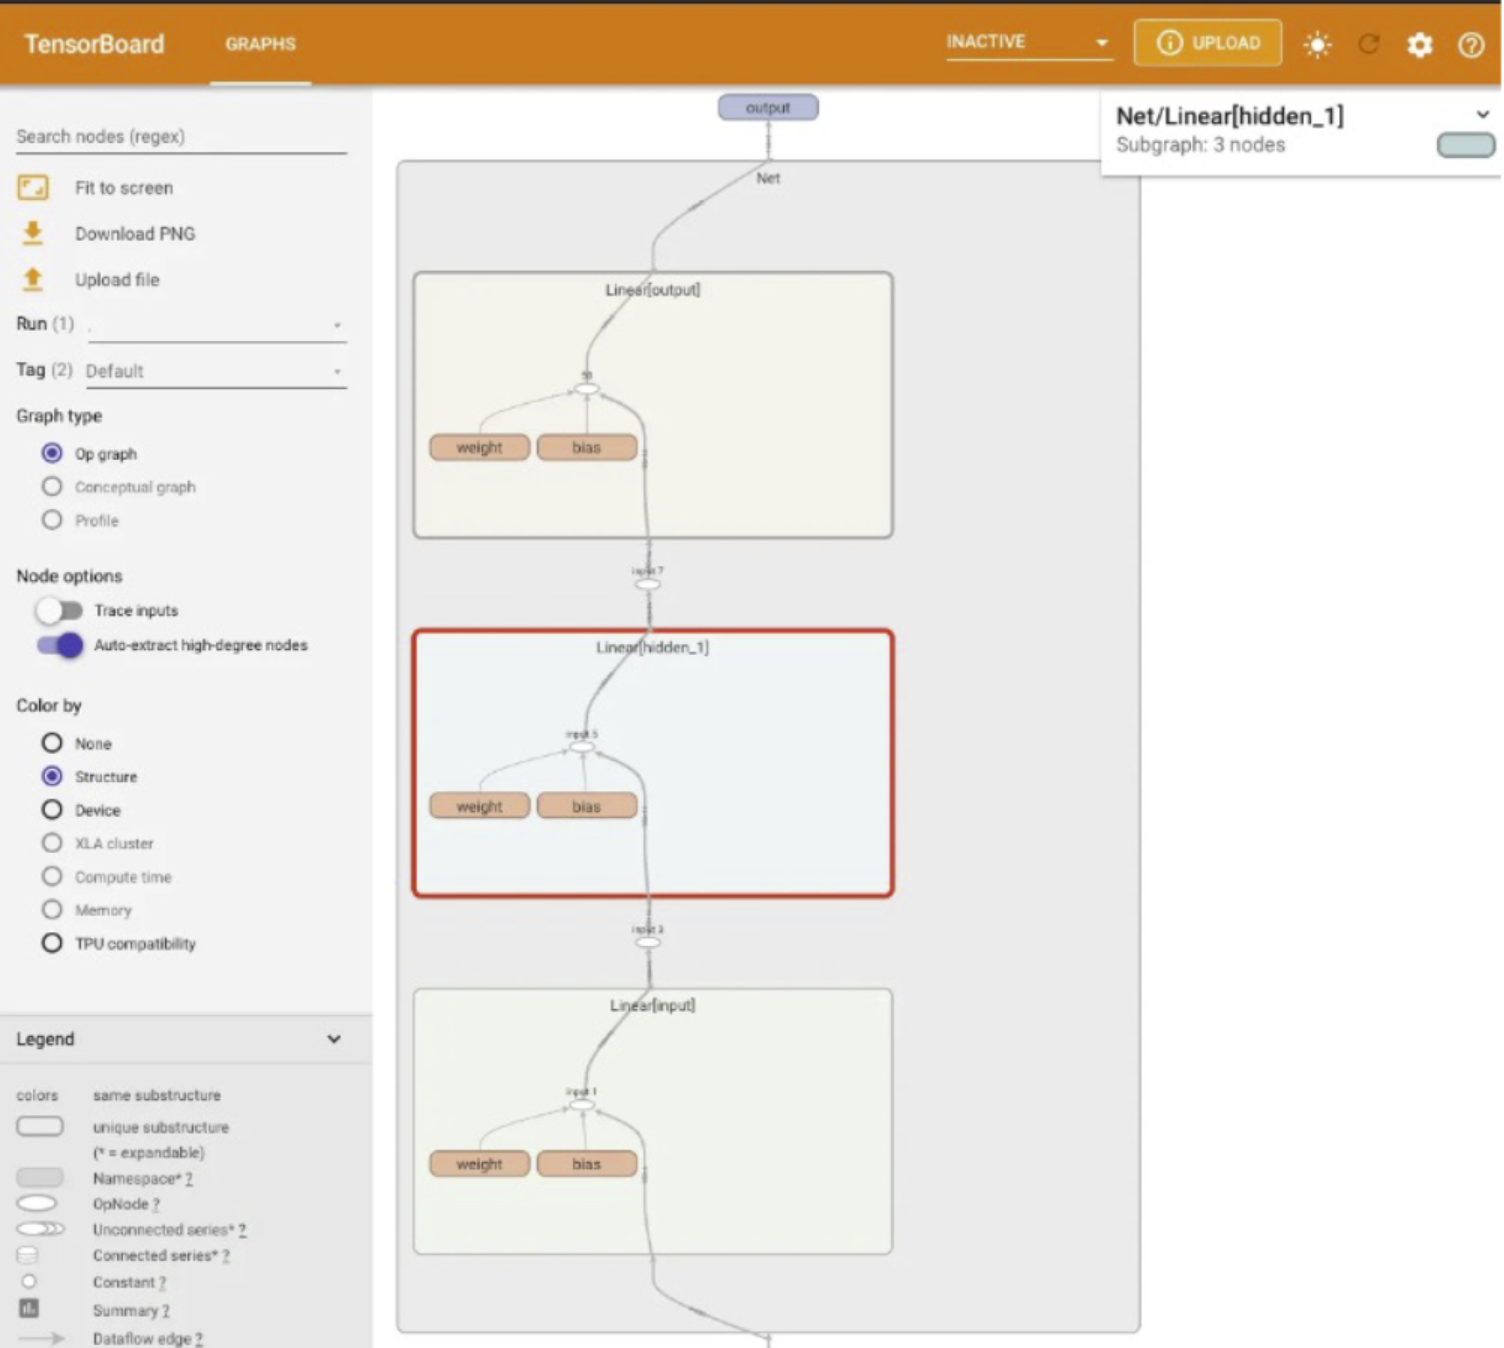

## Autograd and Backpropagation
- Automatic differentiation library that facilitates the computation of gradients for tensor operations.
- Dynamic Computational Graph: Builds graph dynamically during tensor operations, recording dependencies. Backward Propagation: Traverses graph backward to compute gradients for tensors
- Gradient Calculation: Computes gradients efficiently, optimizing parameters during model training.
- Ease of Use: Simplifies training loops, automating gradient computation for developers.

**Autograd Example**
Here is an example, how forward anf backward pass works. \
We can compute $\frac{\partial w}{\partial v}$, which is a log derivative. Once we have log derivative, we can compute $\frac{\partial w}{\partial x}$ and $\frac{\partial w}{\partial y}$, whcih is mult derivative, as long as we knwo the way to compute the derivative for multiplication operation.

<div style="text-align: center;">
    <img src="D:\\Data\\Wax\pygimli_data_abhishek\\pytorch\\images\\03_FW_BW_flowchart.PNG" alt="Fowrward and Backward Comutation" width="600">
</div>


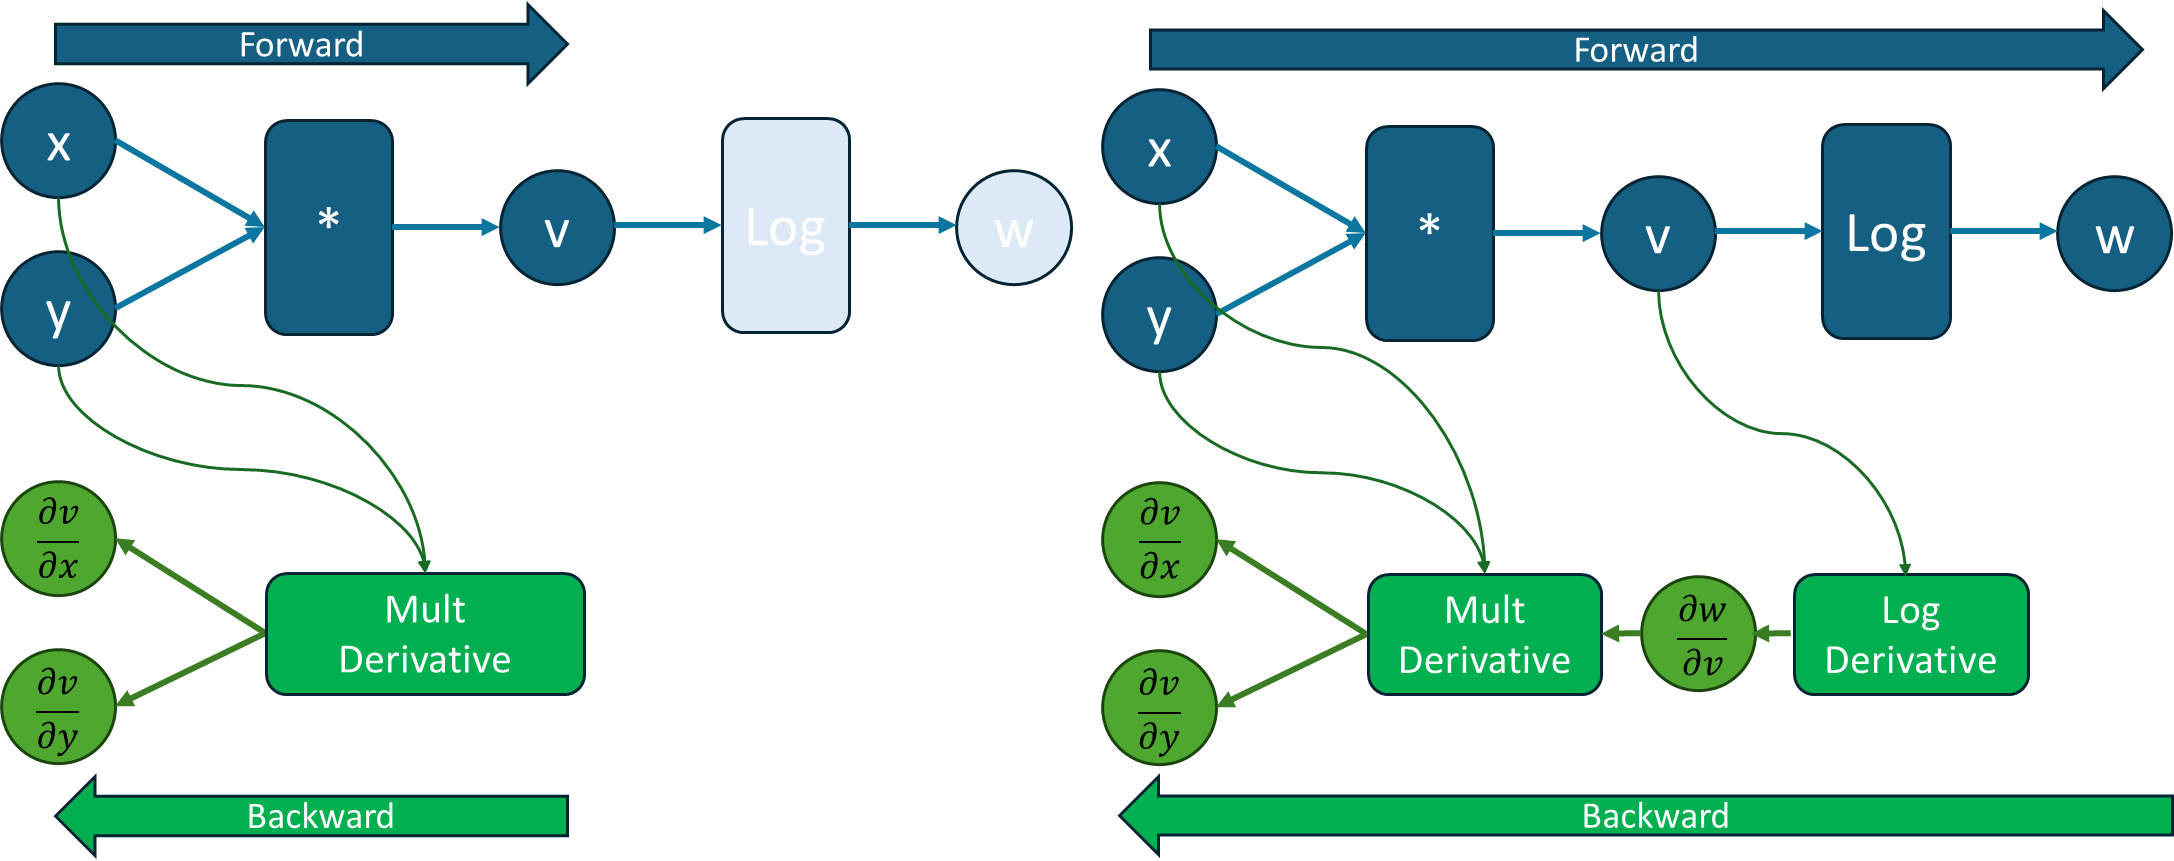

In summary \
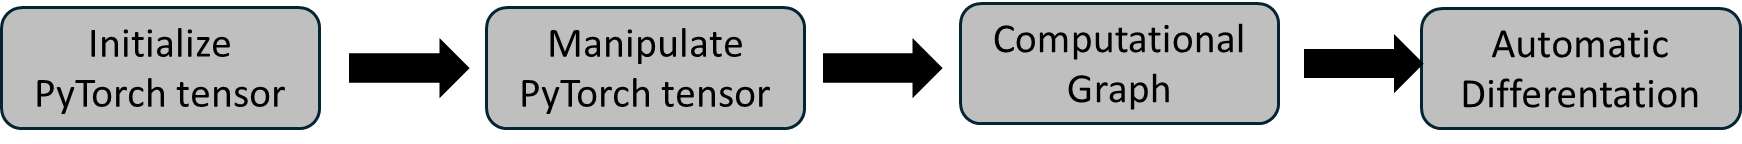

## Gradient Calculation With Autograd
When we need to calculate the gradient, later for the optimization step. \
Lets see the autograd package in pytorch and see how we can calculate gradeints from it. Gradients are important for model optimization

In [ ]:
x = torch.ones(5, requires_grad=True)
print(x)

import torch
x = torch.randn(3)
print(x)

# If we need to Calcualte gradients of some fucntion w.r.t. x, we give additonal arguemnts to tensor
x = torch.randn(3, requires_grad=True)
print(x)

Whenever we will do a computaiton with tensor. Pytorch will create a computaional graph. let's do some operation

$$y = x + 2 $$

It will create a computaitonal graph. For each operation we have a nodes with input and output. Here operation is __additon__. We have input $x$ and $2$; output is $y$. Pytorch create a CG using use backpropagation to calcaulate the gradients.

<center><img src='./images/CG_addition.PNG' width=350px></center> 

First we do a __Forward Pass__. We calcaute the output $y$. Sisnce we specified that it requires the gradient. Pytorch will automatically creates and store a fcuntion for us. This funsiton is than used in the backpropagation to get the gradeints. Here $y$ has an attribute $grad_fn$ So this will point to a gradient function. Her it is called Add Backward, with this fucntion we can than calculate the gradeints, so called backward path. this will calcualte gradeint y w.r.t. $x$ i.e., $dy/dx$

In the background it basically creates a vector __Jacobian__ products to get the gradients, which will look like We have __Jacobain matrix__ of partial derivatives, whcih we multiply it with gradient vector we will get the final gradeitns whcih we are intersted in. Also called __Chain rule__.



So note that we have to multiply $J$ with vector $v$. However in above case $z$ is a scalar value so we dont need to use argument for our backward funciton. But for vector lets see


In [ ]:
import torch
x = torch.randn(3)
print(x)

# If we need to Calcualte gradients of some fucntion w.r.t. x, we give additonal arguemnts to tensor
x = torch.randn(3, requires_grad=True)
print(x)

y = x + 2

In [ ]:
print(x)
# >>>tensor([ 0.1585,  0.1784, -1.3230], requires_grad=True)
print(y) #  Gadient function is AddBackward
#>>>tensor([2.1585, 2.1784, 0.6770], grad_fn=<AddBackward0>)

z = y*y*2
print(z) # Gadient function is MulBackward0
#>>>tensor([9.3183, 9.4910, 0.9166], grad_fn=<MulBackward0>)

# if z is scalar
z = z.mean()
print(z) # Gradient function is MeanBackward0
#>>>tensor(6.5753, grad_fn=<MeanBackward0>)

# to calculate gradients, we jsut need to do
z.backward() # Calcualte gradient of z w.r.t. x dz/dx
print(x.grad)

# if z is vector. In the backgraound it a jacobian vector product so we have to give vecctor
z = y*y*2
z.backward() # it will give error. So we have to give vector of same size

v = torch.tensor([0.1, 1.0, 0.001], dtype=torch.float32)
z.backward(v) #dz/dx

## Prevent pytorch from tracking history and calculating grad_fn attribute.
For example, sometimes in our trainign loop. when we update the weights, this operaion should not be part of gradeint computaiton. We can do it in three ways Stop pytorch in creat `grad_fn`

In [ ]:
# x.requires_grad_(False)
# x.detach()
# with torch.no_grad():

x = torch.randn(3, requires_grad=True)
print(x)
    
x.requires_grad_(False) # rememebr whenever we have fucntion with underscore at the end it will modify our varaible inplace.
print(x)

y = x.detach()
print(y)

with torch.no_grad():
    y = x + 2
    print(y)

Whenever we call the backward function than the gradient for the tensor is accumulated in the `.grad` attribut. So the values is summed up

Lets create dummy training example

In [ ]:
weights = torch.ones(4, requires_grad=true)

for epoch in range(1):
    model_output = (weights*3).sum()
    model_output.backward()
    print(weights.grad)
    
for epoch in range(2):
    model_output = (weights*3).sum()
    model_output.backward()
    print(weights.grad)

We can see all the values are summed up and gradeints are not correct. So before we do the next iteration in optimization step we must empty the gradeint

In [ ]:
for epoch in range(2):
    model_output = (weights*3).sum()
    model_output.backward()
    
    print(weights.grad)
    
    weights.grad.zero_()
    
    print(weights.grad)

# later we will work on pytorch builtin optimizer. So we have to do the same.
weights = torch.ones(4, requires_grad=true)
optimizer = toch.optim.SGD(weights, lr=0.01)
optimizer.step()
optimizer.zero_grad()

## 🎉 **Thank You!** 🙌  
### 🚀 Happy Coding & Keep Learning! 💡

## <span style="color: yellow;">We will see the Backpropagation with detailed theory and example in next notebook</span>